Лаб робота №6 Назаренко Іван ФБ-33

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Завдання 1:

1. Згенеруйте двовимірні дані (x, y) за допомогою numpy.random : бажано, щоб розподіл
точок був навколо деякої наперед заданої прямої (y = kx + b) для подальшого аналізу
результатів.

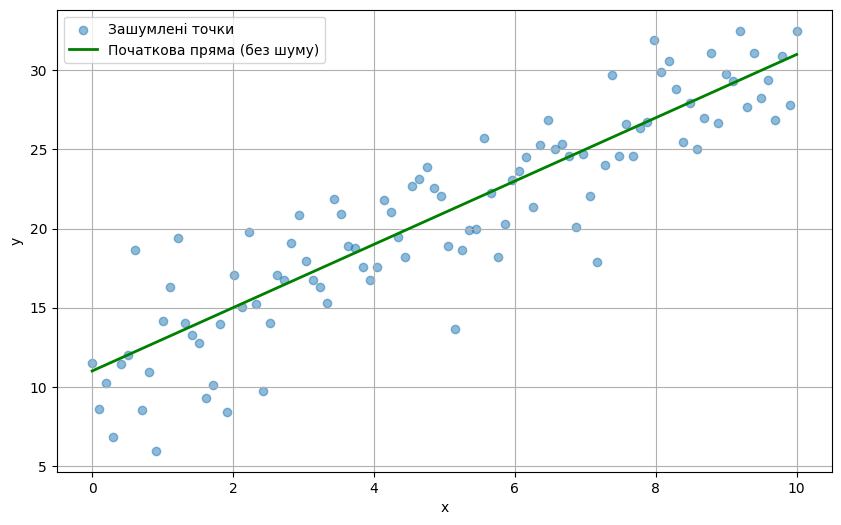

In [2]:
k = 2
b = 11

n = 100
x = np.linspace(0, 10, n)
y = k * x + b
noise = np.random.normal(0, 3, n)
y_s = y + noise

plt.figure(figsize=(10, 6))
plt.scatter(x, y_s, label="Зашумлені точки", alpha=0.5)
plt.plot(x, y, 'g-', linewidth=2, label="Початкова пряма (без шуму)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.legend()
plt.show()

2. Напишіть функцію, яка реалізує метод найменших квадратів для пошуку оптимальних
оцінок k та b.

In [3]:
def least_squares_fit(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    k = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean)**2)
    b = y_mean - (k * x_mean)
    return k, b
    
k_ls, b_ls = least_squares_fit(x, y_s)
print(f"Оптимальна оцінка k:{k_ls}, Оптимальна оцінка b:{b_ls}")

Оптимальна оцінка k:2.0312690742872146, Оптимальна оцінка b:10.53817507164304


3. Порівняйте знайдені параметри з оцінкою np.polyfit(x,y,1) (оцінка полінома
степеню 1 методом найменших квадратів), та з початковими параметрами прямої (якщо
такі є).

In [4]:
k_np, b_np = np.polyfit(x, y_s, 1)
print(f"k_np:{k_np}, b_np:{b_np}")

k_np:2.031269074287215, b_np:10.538175071643039


4. Відобразіть на графіку знайдені оцінки лінії регресії (вашої та numpy). Якщо ви
генерували вхідні дані навколо лінії, відобразіть також її.

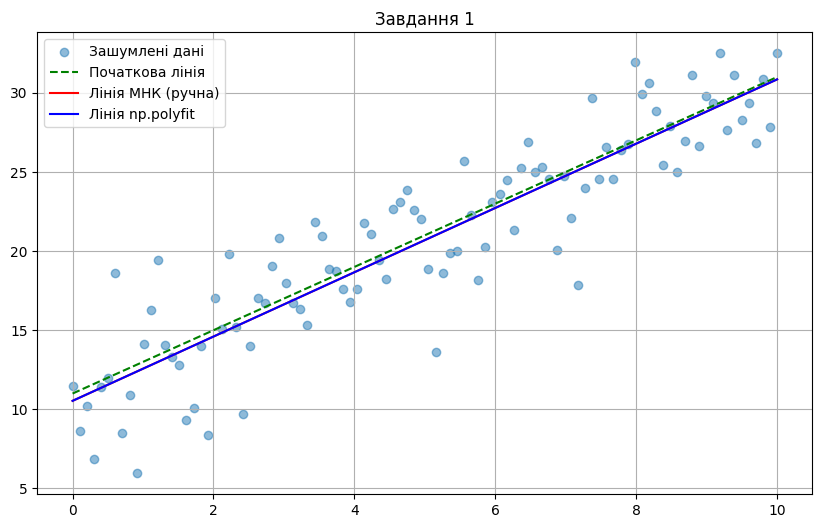

In [5]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y_s, alpha=0.5, label="Зашумлені дані")
plt.plot(x, y, 'g--', label="Початкова лінія")
plt.plot(x, k_ls * x + b_ls, 'r-', label="Лінія МНК (ручна)")
plt.plot(x, k_np * x + b_np, 'b-', label="Лінія np.polyfit")
plt.legend()
plt.title("Завдання 1")
plt.grid()
plt.show()

Завдання 2

1. Напишіть функцію, яка реалізує метод градієнтного спуску для пошуку оптимальних
оцінок k та b. Визначіть оптимальні вхідні параметри: learning_rate, n_iter

In [6]:
def gradient_descent(x, y, learning_rate=0.01, n_iter=1000):
    k = 0.0
    b = 0.0
    n = len(x)
    errors = []

    for i in range(n_iter):
        y_pred = k * x + b
        error = np.mean((y - y_pred)**2)
        errors.append(error)

        dk = -2 * np.sum((y - y_pred) * x) / n
        db = -2 * np.sum(y - y_pred) / n

        k -= learning_rate * dk
        b -= learning_rate * db

    return k, b, errors

k_gd, b_gd, error_list = gradient_descent(x, y_s)
print(f"k_gd:{k_gd}, b_gd:{b_gd}")

k_gd:2.041649560326413, b_gd:10.469137605495321


2. Додайте отриману лінію регресії на загальний графік

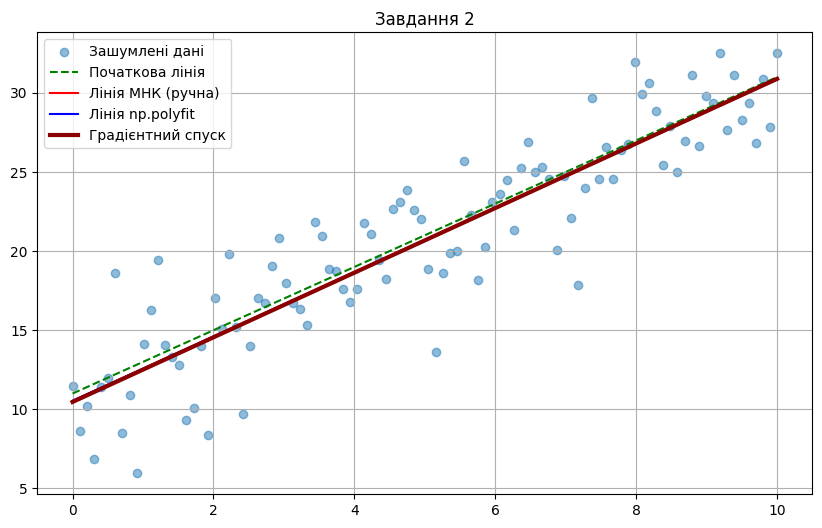

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y_s, alpha=0.5, label="Зашумлені дані")
plt.plot(x, y, 'g--', label="Початкова лінія")
plt.plot(x, k_ls * x + b_ls, 'r-', label="Лінія МНК (ручна)")
plt.plot(x, k_np * x + b_np, 'b-', label="Лінія np.polyfit")
plt.plot(x, k_gd * x + b_gd, color='darkred', linestyle='-', linewidth=3, label="Градієнтний спуск")
plt.legend()
plt.title("Завдання 2")
plt.grid()
plt.show()

3. Побудуйте графік похибки від кількості ітерацій, зробіть висновки

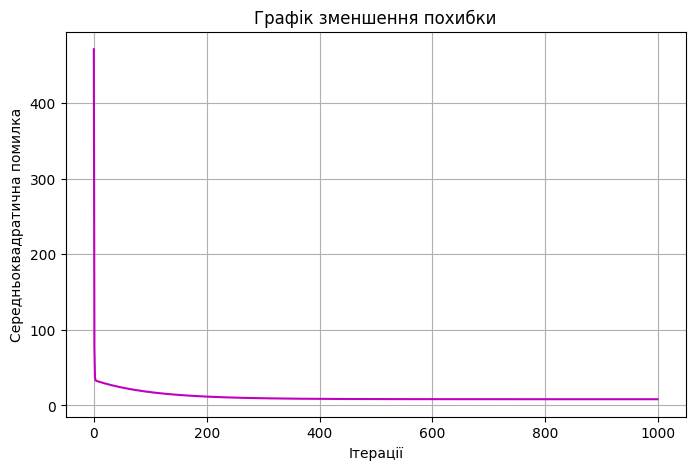

In [8]:
plt.figure(figsize=(8, 5))
plt.plot(error_list, 'm')
plt.title("Графік зменшення похибки")
plt.xlabel("Ітерації")
plt.ylabel("Середньоквадратична помилка")
plt.grid()
plt.show()

4. Порівняйте отримані результати з результатами попереднього завдання

In [9]:
print(f"k:{k}, b:{b}")
print(f"Оптимальна оцінка k:{k_ls}, Оптимальна оцінка b:{b_ls}")
print(f"k_np:{k_np}, b_np:{b_np}")
print(f"k_gd:{k_gd}, b_gd:{b_gd}")

k:2, b:11
Оптимальна оцінка k:2.0312690742872146, Оптимальна оцінка b:10.53817507164304
k_np:2.031269074287215, b_np:10.538175071643039
k_gd:2.041649560326413, b_gd:10.469137605495321
